<a href="https://colab.research.google.com/github/Israel-San-Agustin/METODOS-NUMERICOS-/blob/main/Polinomio_Osculante_de_Hermite_con_Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $Polinomio$ $Osculante$ $de$ $Hermite$

In [8]:
import numpy as np
import sympy as sp
from tabulate import tabulate
import matplotlib.pyplot as plt

In [9]:
# === Método de Hermite ===
def Hermite(xi, fi, dfi, x):
    n = len(xi)
    z = np.zeros(2 * n)  # Nodos duplicados
    Q = np.zeros((2 * n, 2 * n))  # Tabla de coeficientes del método de diferencias divididas

    # Paso 1: Inicializar nodos y primera columna de Q
    for i in range(n):
        z[2 * i] = xi[i]
        z[2 * i + 1] = xi[i]
        Q[2 * i][0] = fi[i]
        Q[2 * i + 1][0] = fi[i]
        Q[2 * i + 1][1] = dfi[i]
        if i != 0:
            Q[2 * i][1] = (Q[2 * i][0] - Q[2 * i - 1][0]) / (z[2 * i] - z[2 * i - 1])

    # Paso 2: Calcular el resto de la tabla de diferencias divididas
    for i in range(2, 2 * n):  # Recorrer columnas
        for j in range(i, 2 * n):  # Recorrer filas desde la diagonal principal
            Q[j][i] = (Q[j][i - 1] - Q[j - 1][i - 1]) / (z[j] - z[j - i])

    # Paso 3: Construir el polinomio de Hermite
    x_sym = sp.Symbol('x')
    polinomio = Q[0][0]
    producto = 1
    for i in range(1, 2 * n):
        producto *= (x_sym - z[i - 1])
        polinomio += Q[i][i] * producto

    # Paso 4: Evaluar el polinomio en el punto x
    valor_polinomio = float(sp.N(polinomio.subs(x_sym, x)))

    return Q, z, sp.expand(polinomio), valor_polinomio


In [10]:

# === Función para graficar ===
def graficar_hermite(xi, fi, polinomio):
    x_vals = np.linspace(min(xi) - 0.5, max(xi) + 0.5, 500)
    f_lambdified = sp.lambdify(sp.Symbol('x'), polinomio, 'numpy')
    y_vals = f_lambdified(x_vals)

    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label="Polinomio de Hermite", color="blue")
    plt.scatter(xi, fi, color="red", label="Datos originales", zorder=5)
    plt.title("Interpolación de Hermite")
    plt.xlabel("x")
    plt.ylabel("H(x)")
    plt.legend()
    plt.grid()
    plt.show()

Tabla de diferencias divididas:
╒════╤══════════╤═══════════╤═════════════╤═══════════╤════════════╤═════════════╕
│    │       Q0 │        Q1 │          Q2 │        Q3 │         Q4 │          Q5 │
╞════╪══════════╪═══════════╪═════════════╪═══════════╪════════════╪═════════════╡
│  0 │ 0.620086 │  0        │  0          │ 0         │ 0          │  0          │
├────┼──────────┼───────────┼─────────────┼───────────┼────────────┼─────────────┤
│  1 │ 0.620086 │ -0.522023 │  0          │ 0         │ 0          │  0          │
├────┼──────────┼───────────┼─────────────┼───────────┼────────────┼─────────────┤
│  2 │ 0.455402 │ -0.548946 │ -0.0897427  │ 0         │ 0          │  0          │
├────┼──────────┼───────────┼─────────────┼───────────┼────────────┼─────────────┤
│  3 │ 0.455402 │ -0.569896 │ -0.069833   │ 0.0663656 │ 0          │  0          │
├────┼──────────┼───────────┼─────────────┼───────────┼────────────┼─────────────┤
│  4 │ 0.281819 │ -0.578612 │ -0.0290537  │ 0.0679656 │

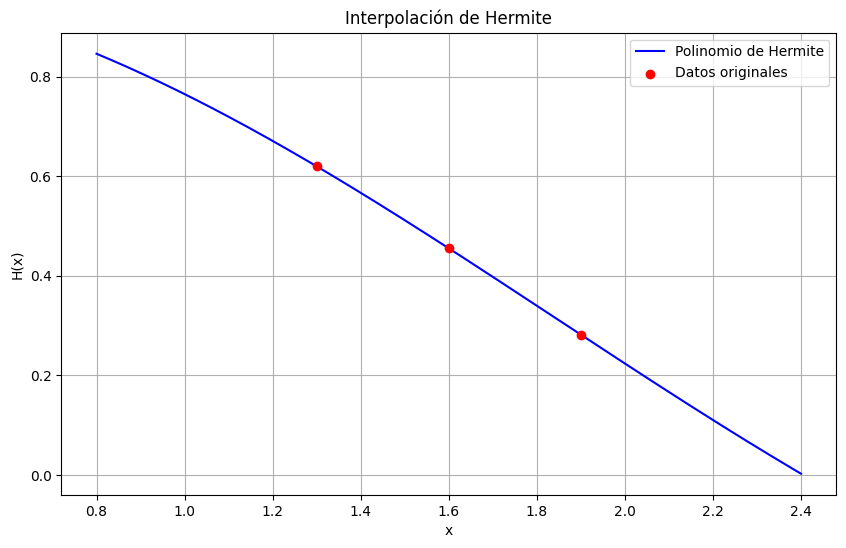

In [12]:
# === Bloque principal ===
if __name__ == "__main__":
    # === Configuración inicial ===
    xi = [1.3, 1.6, 1.9]  # Puntos x
    fi = [0.620086, 0.4554022, 0.2818186]  # Valores f(x)
    dfi = [-0.5220232, -0.5698959, -0.5811571]  # Derivadas f'(x)
    valores_x = [1.5]  # Valores de x para evaluar el polinomio

    # === Llamar al método de Hermite ===
    Q, z, polinomio, valor_evaluado = Hermite(xi, fi, dfi, valores_x[0])

    # === Mostrar la tabla de diferencias divididas ===
    print("Tabla de diferencias divididas:")
    cabeceras = [f"Q{i}" for i in range(Q.shape[1])]

    tabla = tabulate(Q, headers=cabeceras, showindex=list(range(len(z))), tablefmt="fancy_grid")
    print(tabla)

    # === Mostrar el polinomio ===
    print("\nEl Polinomio de Hermite obtenido es:")
    print(f"H(x) = {polinomio}")

    # === Evaluar el polinomio ===
    print(f"\nEl valor del polinomio evaluado en x = {valores_x[0]} es:")
    print(f"H({valores_x[0]}) = {valor_evaluado}")

    # === Graficar el polinomio ===
    graficar_hermite(xi, fi, polinomio)
